In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
url='bank-additional-full.csv'
urln='bank-additional-names.txt'

In [3]:
btd = pd.read_csv(url, delimiter = ';')
btd

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
btd = btd.drop(['day_of_week'], axis=1)

In [5]:
for col in btd.select_dtypes(include='object').columns:
    print(col)
    print(btd[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [6]:
btd1=btd.replace(to_replace='\.', value= "_", regex=True)
btd2=btd1.replace(to_replace='\-', value= "_", regex=True)
btd2

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic_4y,no,no,no,telephone,may,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high_school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high_school,no,yes,no,telephone,may,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin_,married,basic_6y,no,no,no,telephone,may,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high_school,no,no,yes,telephone,may,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional_course,no,yes,no,cellular,nov,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue_collar,married,professional_course,no,no,no,cellular,nov,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university_degree,no,yes,no,cellular,nov,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional_course,no,no,no,cellular,nov,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
features_na = [features for features in btd2.columns if btd2[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(btd2[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


In [8]:
categorical_features=[feature for feature in btd1.columns if ((btd1[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [9]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(btd1[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 4
The feature is education and number of categories are 8
The feature is default and number of categories are 3
The feature is housing and number of categories are 3
The feature is loan and number of categories are 3
The feature is contact and number of categories are 2
The feature is month and number of categories are 10
The feature is poutcome and number of categories are 3


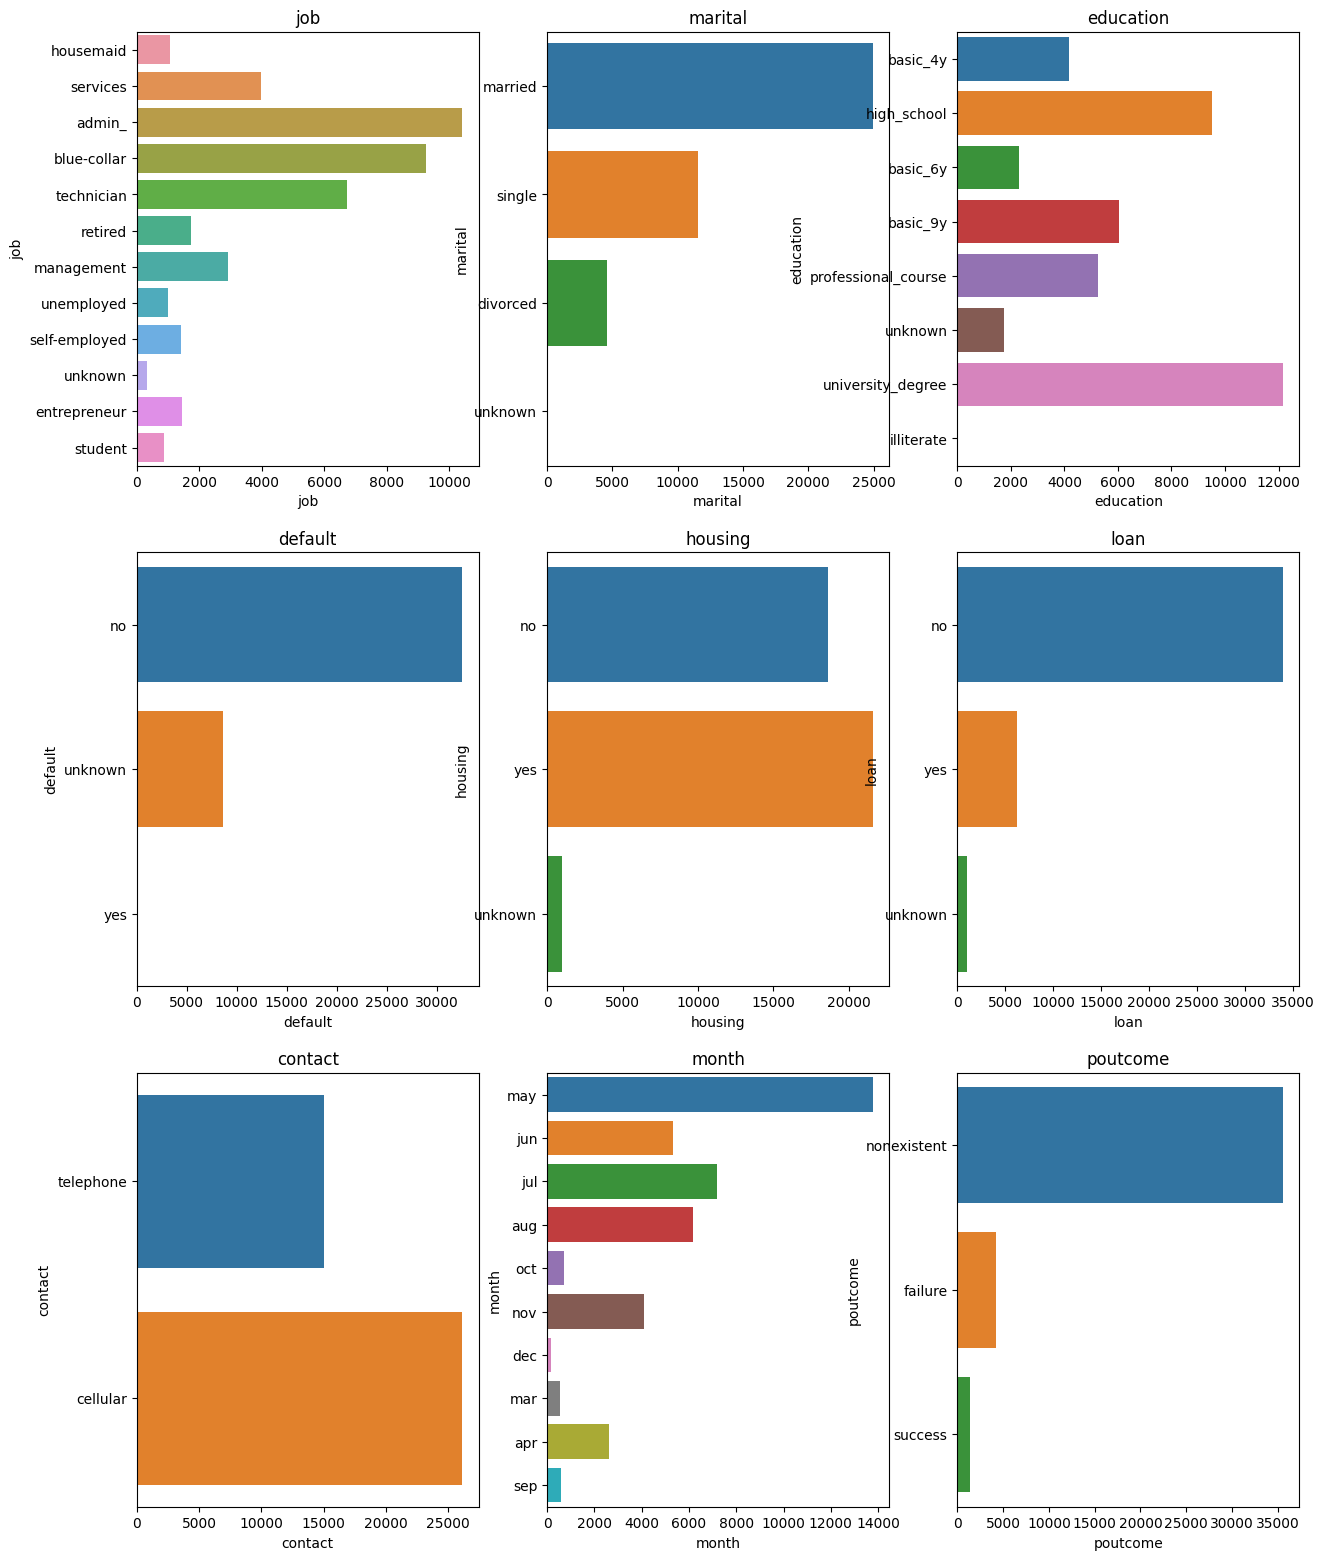

In [10]:
plt.figure(figsize=(15,80))
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=btd1)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

In [11]:
btd["default"].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Name: default, Length: 41188, dtype: bool

In [12]:
numerical_features = [feature for feature in btd2.columns if ((btd2[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

btd2[numerical_features].head()

Number of numerical variables:  10


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [13]:
discrete_feature=[feature for feature in numerical_features if len(btd2[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


In [14]:
for categorical_feature in categorical_features:
    print(btd2.groupby(['y',categorical_feature]).size())

y    job          
no   admin_           9070
     blue_collar      8616
     entrepreneur     1332
     housemaid         954
     management       2596
     retired          1286
     self_employed    1272
     services         3646
     student           600
     technician       6013
     unemployed        870
     unknown           293
yes  admin_           1352
     blue_collar       638
     entrepreneur      124
     housemaid         106
     management        328
     retired           434
     self_employed     149
     services          323
     student           275
     technician        730
     unemployed        144
     unknown            37
dtype: int64
y    marital 
no   divorced     4136
     married     22396
     single       9948
     unknown        68
yes  divorced      476
     married      2532
     single       1620
     unknown        12
dtype: int64
y    education          
no   basic_4y                3748
     basic_6y                2104
     basic_9y   

In [15]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


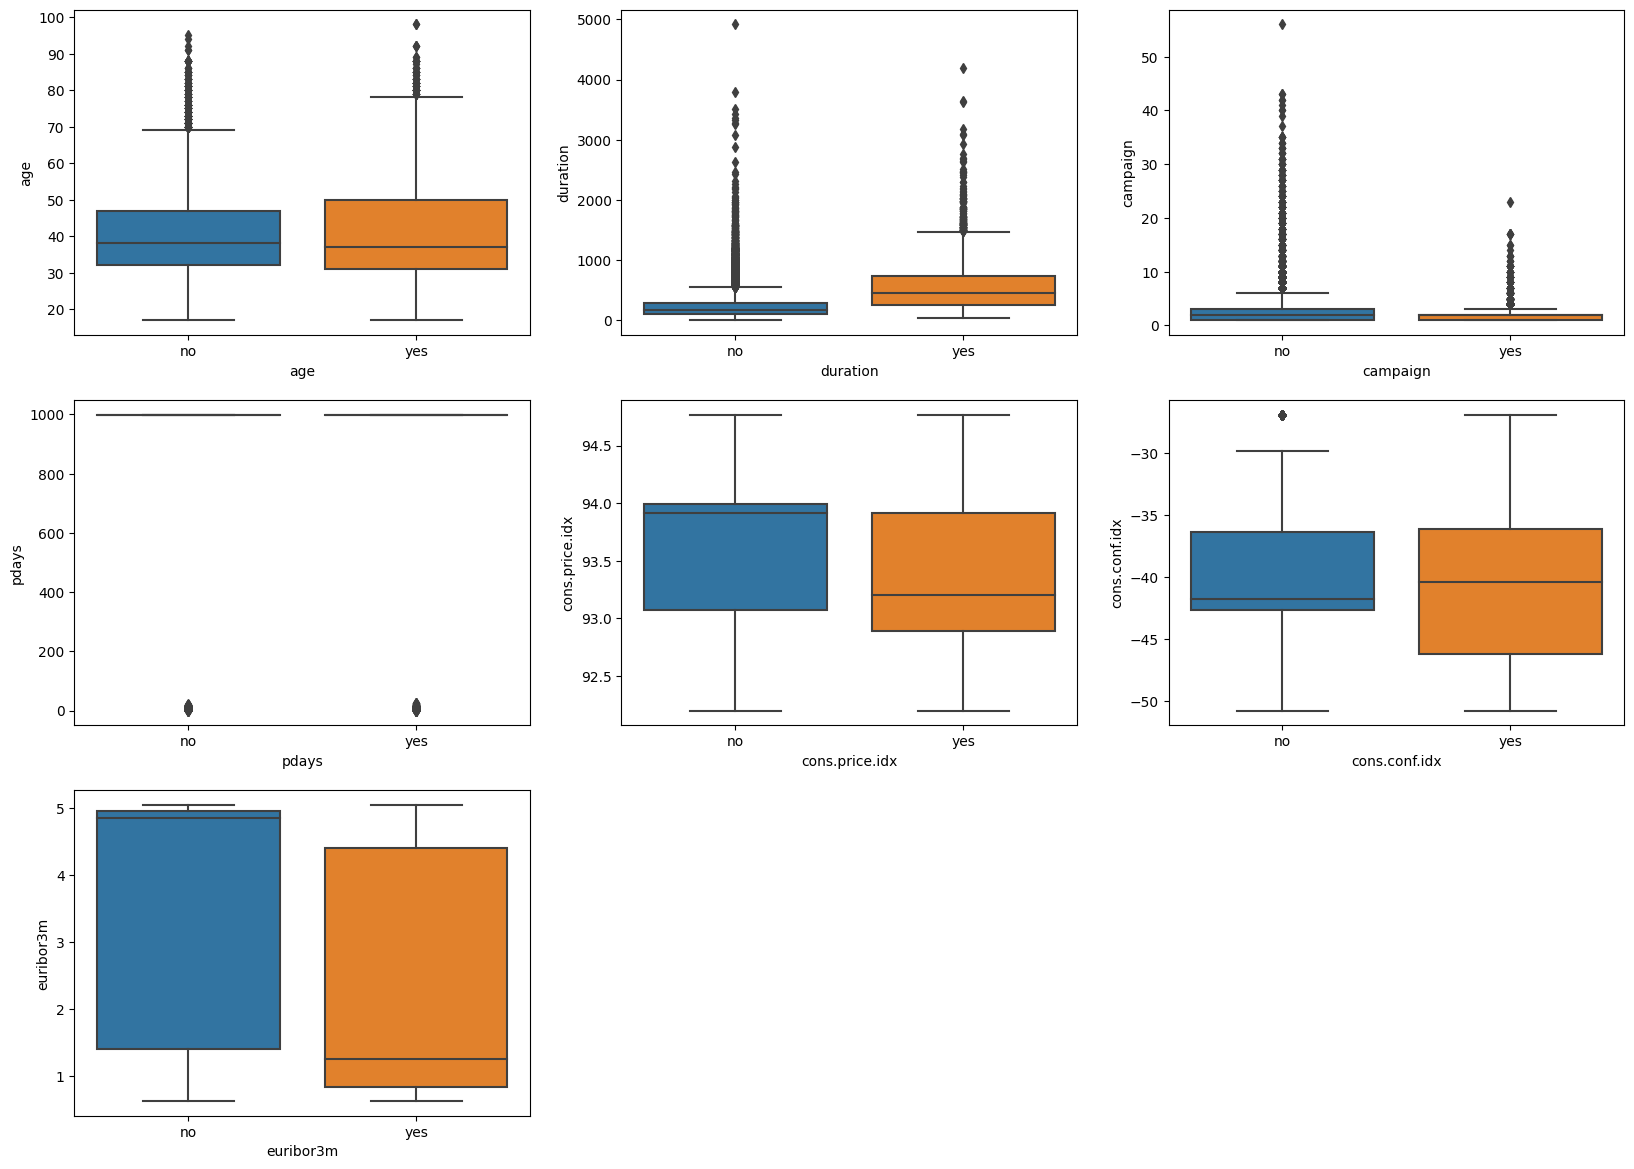

In [16]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= btd2[feature], data=btd2)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

In [17]:
# cor_mat=btd2.corr()
# fig = plt.figure(figsize=(15,7))
# sns.heatmap(cor_mat,annot=True)

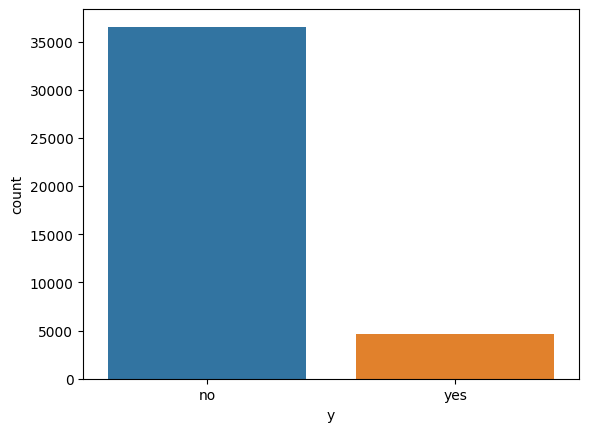

In [18]:
sns.countplot(x='y',data=btd2)
plt.show()

In [19]:
btd2['y'].groupby(btd2['y']).count()

y
no     36548
yes     4640
Name: y, dtype: int64

In [20]:
btd2.groupby(['y','default']).size()

y    default
no   no         28391
     unknown     8154
     yes            3
yes  no          4197
     unknown      443
dtype: int64

In [21]:
btd2.drop(['default'],axis=1, inplace=True)
btd2.groupby(['y','pdays']).size()

y    pdays
no   0            5
     1           18
     2           24
     3          141
     4           55
     5           17
     6          123
     7           20
     8            6
     9           29
     10          22
     11          13
     12          32
     13           8
     14           9
     15           8
     16           5
     17           6
     18           3
     19           2
     20           1
     22           1
     999      36000
yes  0           10
     1            8
     2           37
     3          298
     4           63
     5           29
     6          289
     7           40
     8           12
     9           35
     10          30
     11          15
     12          26
     13          28
     14          11
     15          16
     16           6
     17           2
     18           4
     19           1
     21           2
     22           2
     25           1
     26           1
     27           1
     999       3673
dtype: in

In [22]:
btd2.groupby(['y','duration'],sort=True)['duration'].count()

btd2.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           15342
     2            9359
     3            4767
     4            2402
     5            1479
     6             904
     7             591
     8             383
     9             266
     10            213
     11            165
     12            122
     13             88
     14             68
     15             49
     16             51
     17             54
     18             33
     19             26
     20             30
     21             24
     22             17
     23             15
     24             15
     25              8
     26              8
     27             11
     28              8
     29             10
     30              7
     31              7
     32              4
     33              4
     34              3
     35              5
     37              1
     39              1
     40              2
     41              1
     42              2
     43              2
     56              1
yes  1            23

In [23]:
btd3 = btd2[btd2['campaign'] < 33]
btd3.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           15342
     2            9359
     3            4767
     4            2402
     5            1479
     6             904
     7             591
     8             383
     9             266
     10            213
     11            165
     12            122
     13             88
     14             68
     15             49
     16             51
     17             54
     18             33
     19             26
     20             30
     21             24
     22             17
     23             15
     24             15
     25              8
     26              8
     27             11
     28              8
     29             10
     30              7
     31              7
     32              4
yes  1            2300
     2            1211
     3             574
     4             249
     5             120
     6              75
     7              38
     8              17
     9              17
     10             12
     11             

In [24]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    btd3 = pd.concat([btd3.drop(col, axis=1),pd.get_dummies(btd3[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [25]:
btd3['housing'] = btd3['housing'].map({'yes': 1, 'no': 0})

In [26]:
btd3.replace({True: 1, False: 0})

,age,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,56,0.0,no,261,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,1,0
1,57,0.0,no,149,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,1,0
2,37,1.0,no,226,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,1,0
3,40,0.0,no,151,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,1,0
4,56,0.0,yes,307,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1.0,no,334,1,999,0,-1.1,94.767,-50.8,...,0,0,0,0,0,1,0,0,1,0
41184,46,0.0,no,383,1,999,0,-1.1,94.767,-50.8,...,0,0,0,0,0,1,0,0,1,0
41185,56,1.0,no,189,2,999,0,-1.1,94.767,-50.8,...,0,0,0,0,0,1,0,0,1,0
41186,44,0.0,no,442,1,999,0,-1.1,94.767,-50.8,...,0,0,0,0,0,1,0,0,1,0


In [27]:
btd3['loan'] = btd3['loan'].map({'yes': 1, 'no': 0})

In [28]:
btd3.head().replace({True: 1, False: 0})

,age,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,56,0.0,0.0,261,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,1,0
1,57,0.0,0.0,149,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,1,0
2,37,1.0,0.0,226,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,1,0
3,40,0.0,0.0,151,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,1,0
4,56,0.0,1.0,307,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,1,0


In [29]:
X = btd3.drop(['y'],axis=1)
y = btd3['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [30]:
len(X_train)

28816

In [31]:
len(X_test)

12350

In [33]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Tejo Vardhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tejo Vardhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Tejo Vardhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Tejo Vardhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Tejo Vardhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Tejo Vardhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 959, in check_array
    _assert_all_finite(
  File "C:\Users\Tejo Vardhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 124, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "C:\Users\Tejo Vardhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 173, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
